In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [546]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [547]:
df.shape

(730, 16)

In [548]:
# to check if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [549]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Visualising the Data

In [550]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [551]:
# dividing variables in continuous and categorical
cont_var = ["instant","dteday","temp","atemp","hum","windspeed","casual","registered","cnt"]
cat_var = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [553]:
df[cont_var].corr()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
temp,0.150738,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.629896,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Figure size 2000x1200 with 0 Axes>

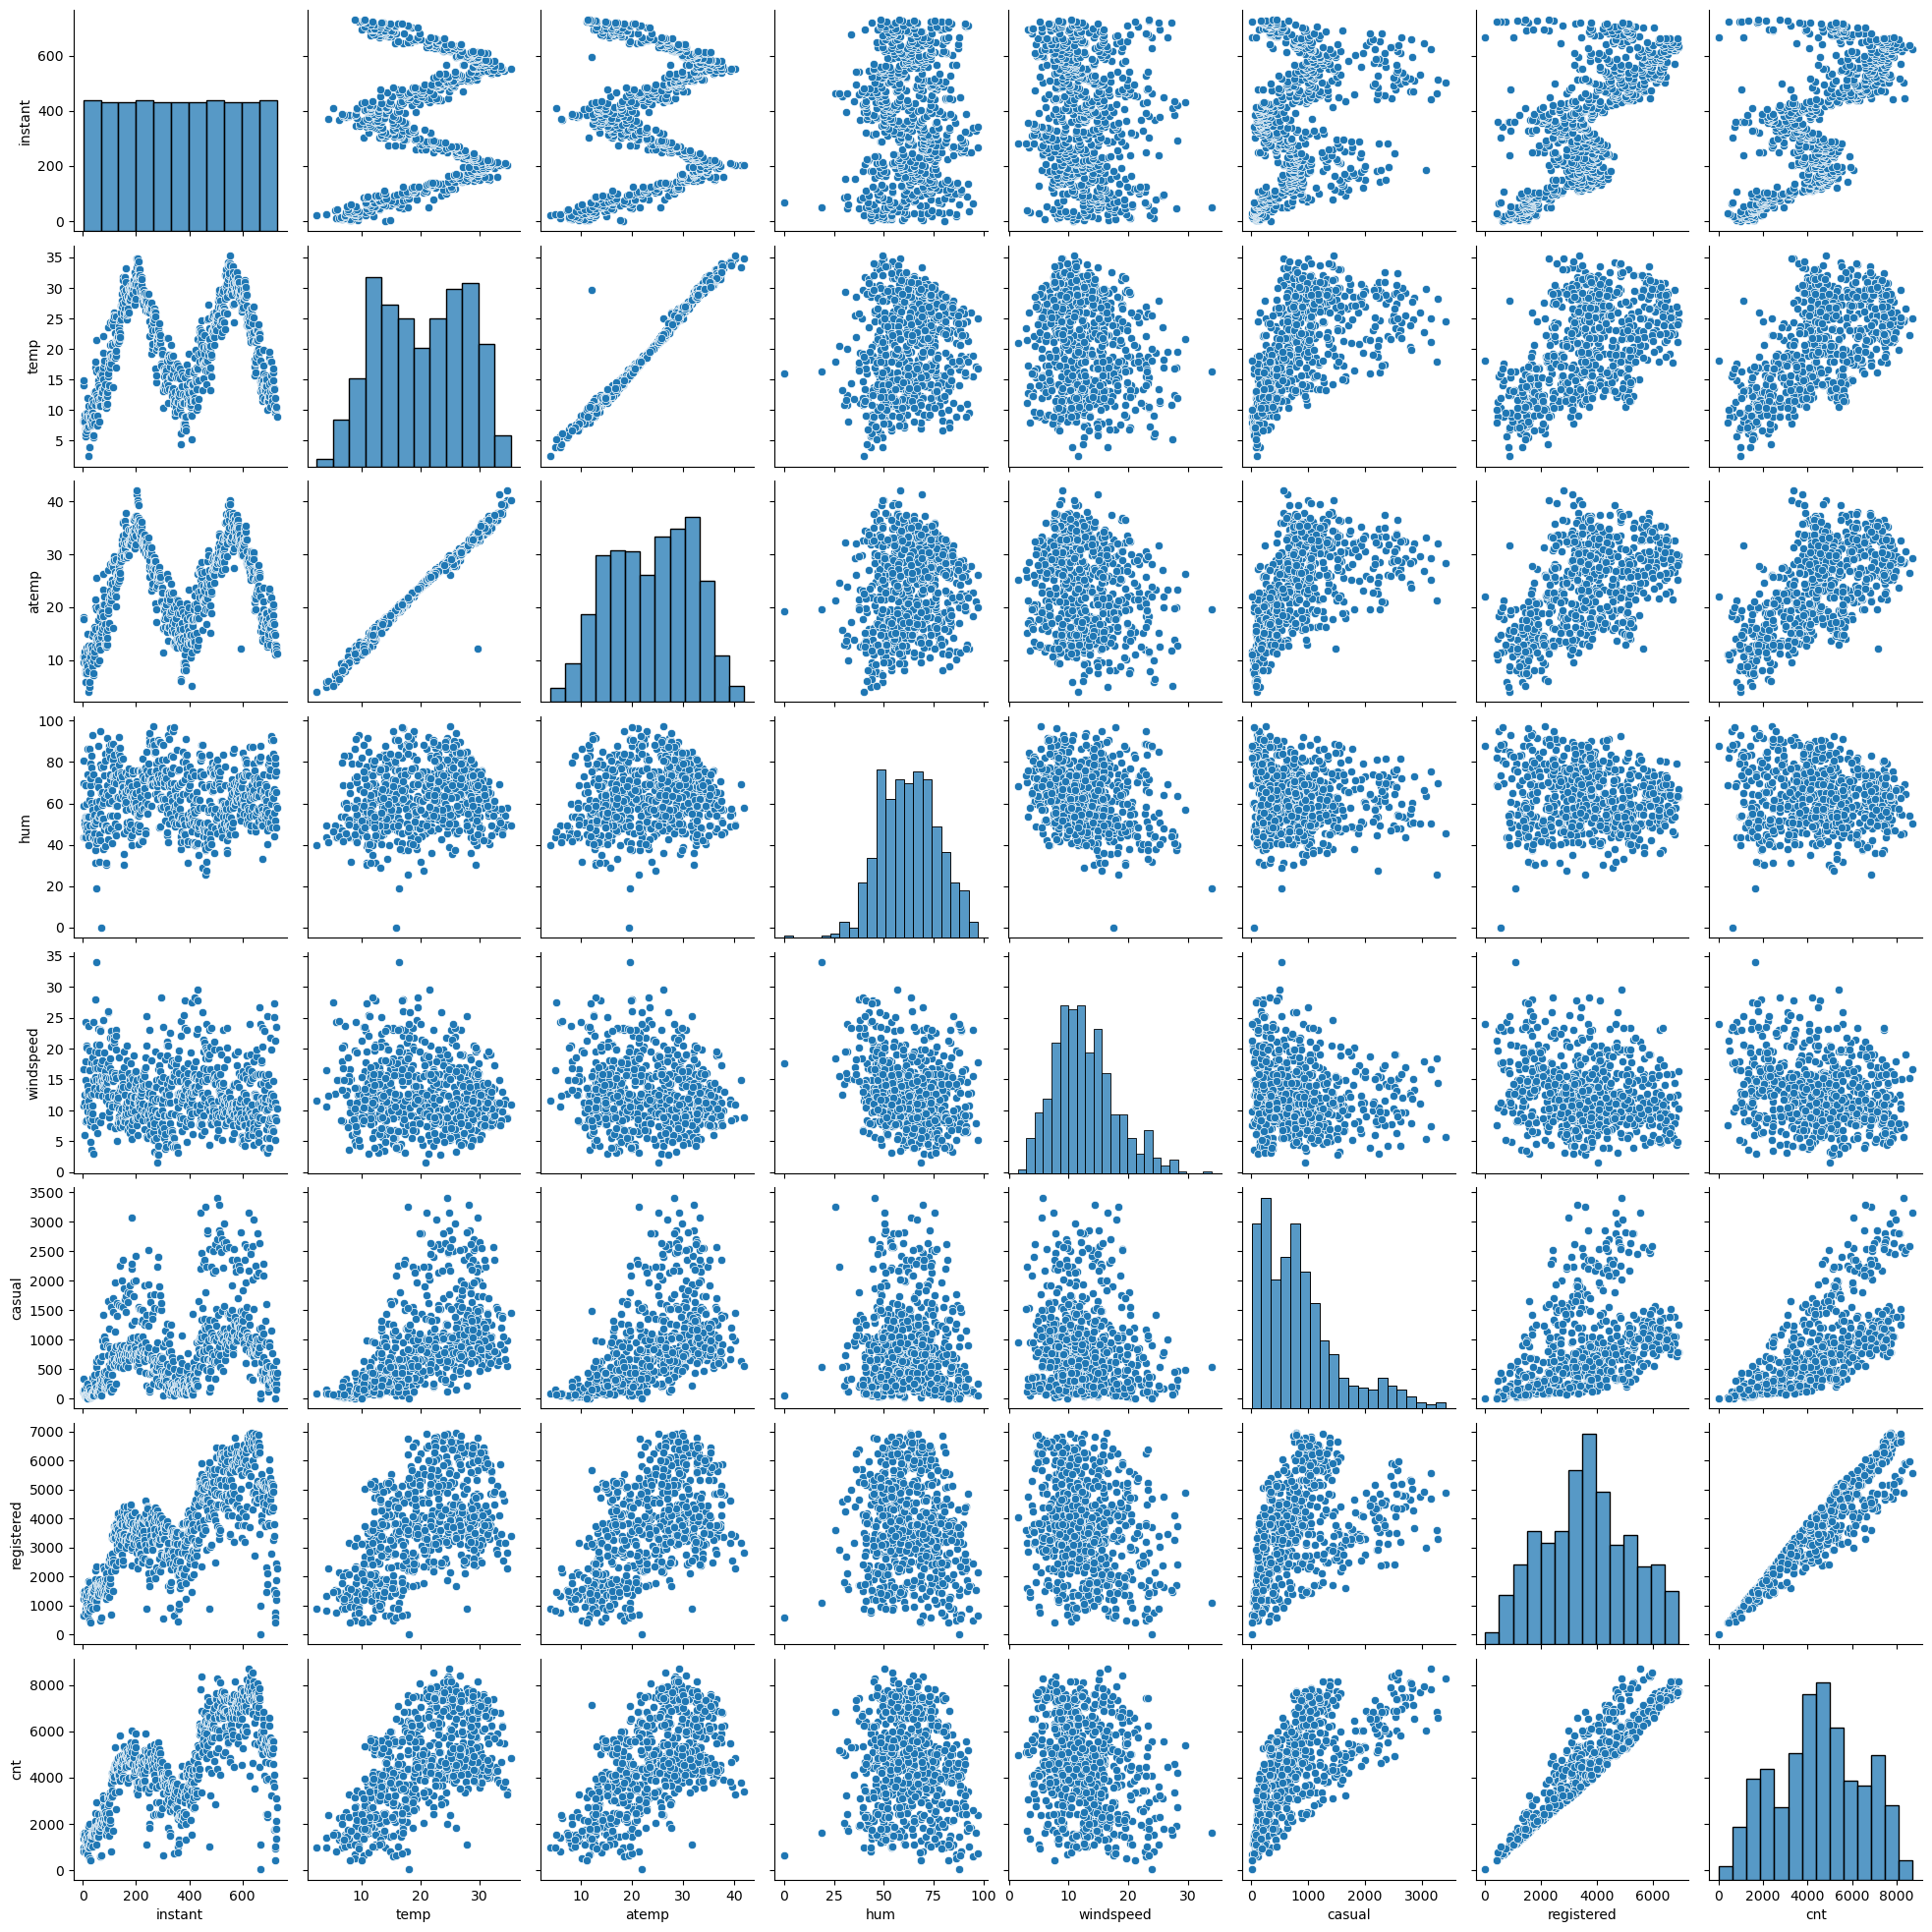

In [552]:
plt.figure(figsize=(20, 12))
sns.pairplot(df[cont_var])
plt.show()
# we can see that some of the variables are positively correlated, like temp. 

In [ ]:
### Vistualising categorical variable

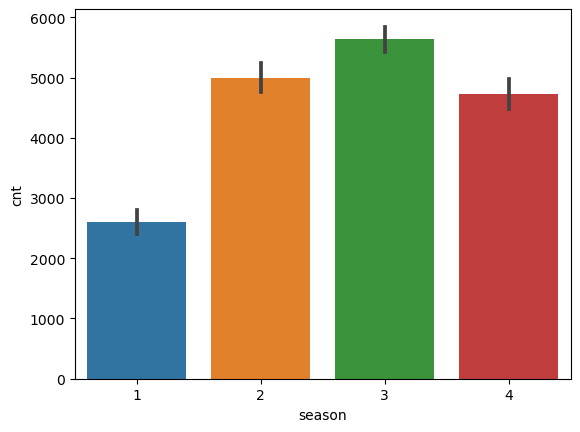

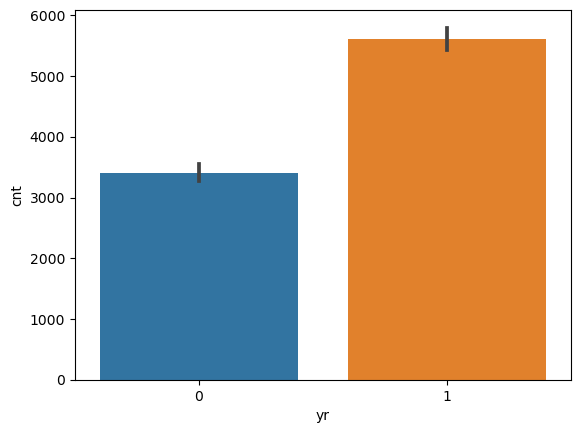

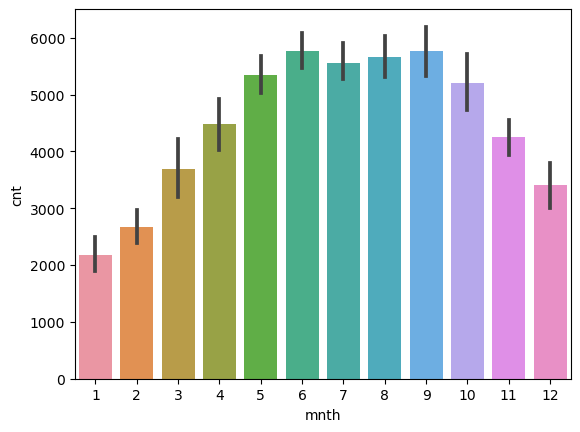

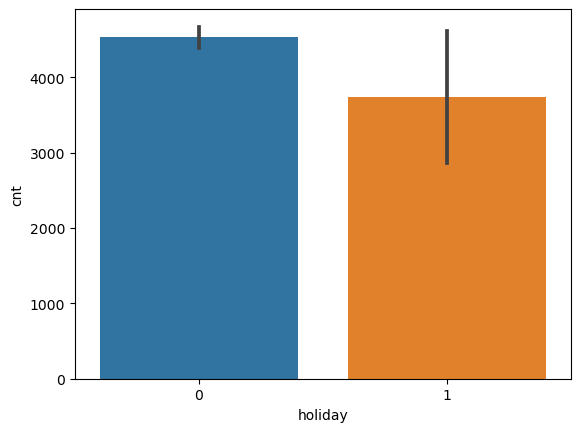

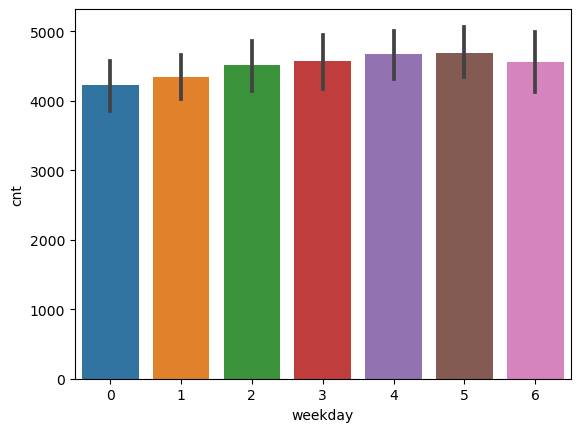

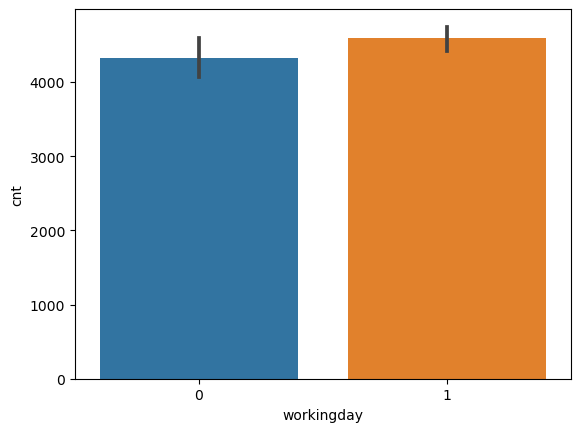

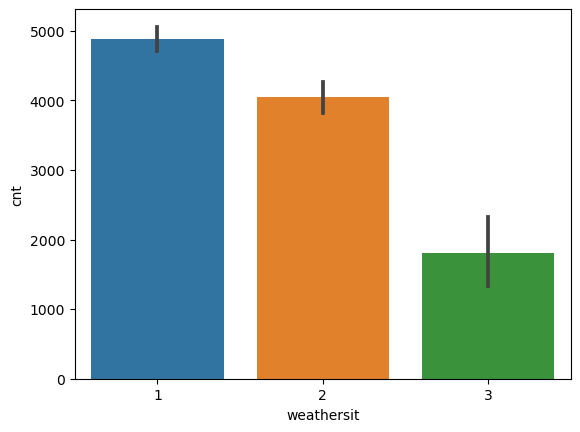

In [487]:
for i in cat_var:
    sns.barplot(x=df[i],y=df["cnt"])
    plt.show()

### from above graph we can say that:
#### bike count is more in season 3 (fall) 
#### bike count is more in 2019
#### bike count is more in month from May - Oct
#### bike count is more when no holiday
#### bike count is more when no holiday or weekends
#### bike count is more in clear weather 

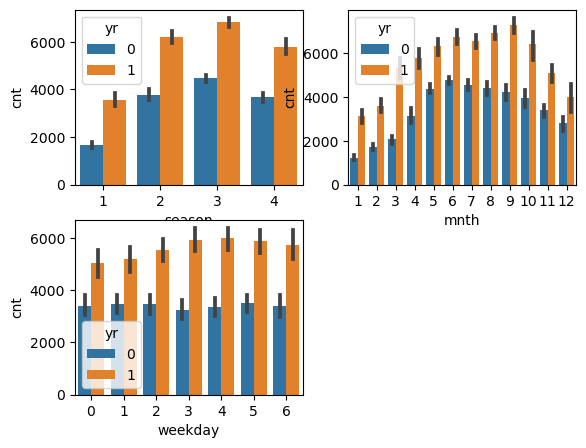

In [488]:
plt.figure(figsize = (10, 5))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', hue = 'yr', data = df)
plt.subplot(2,3,2)
sns.barplot(x = 'mnth', y = 'cnt', hue = 'yr', data = df)
plt.subplot(2,3,4)
sns.barplot(x = 'weekday', y = 'cnt', hue = 'yr', data = df)
plt.show()

In [489]:
# from above graph we can see that in 2019 bike rent is more

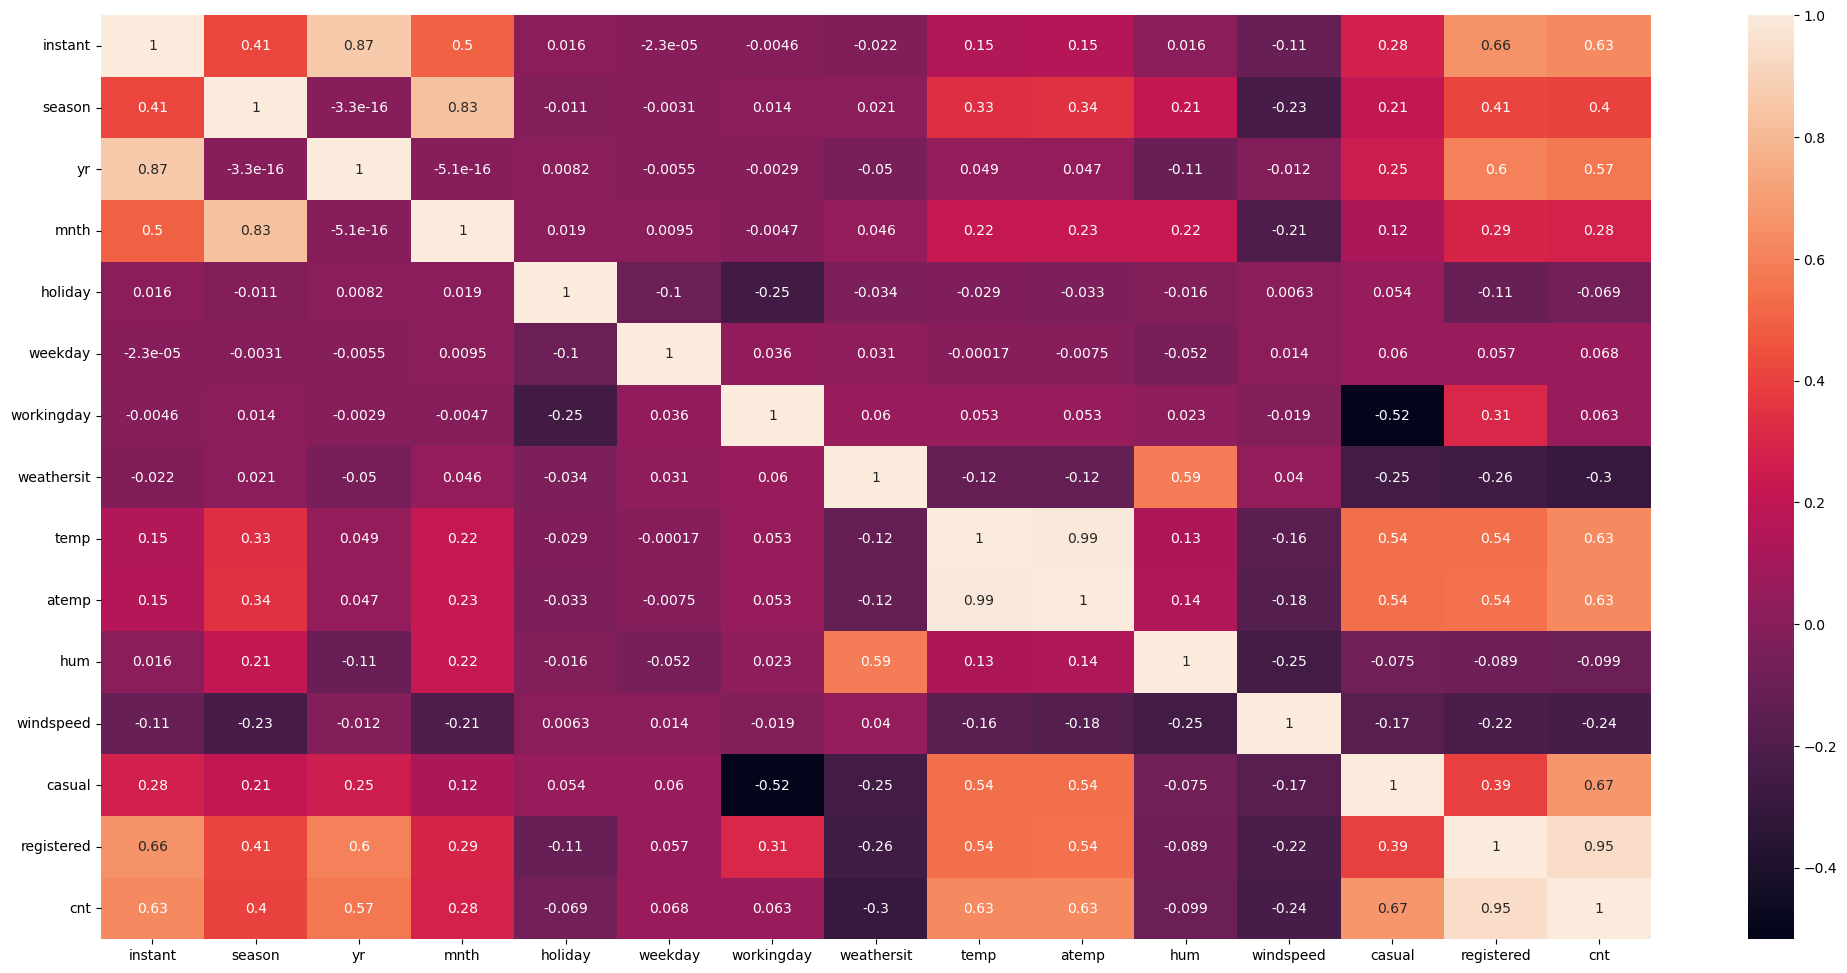

In [490]:
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()
# from heat map we can see that some variables has -ve correlation as well

### Dropping unnecessary variables

In [491]:
# since cnt = registered + casual -> we can drop registered and casual
# dteday, atemp, instant -> dropping unnecessary variable 
df = df.drop(["registered","casual","dteday","atemp","instant"],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Creating dummy variables

In [492]:
# if we create dummy variables of categorical variables, there will be many columns with same name
# hance, mapping variable
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


In [493]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

In [494]:
season = pd.get_dummies(df['season'], drop_first = True)
mnth = pd.get_dummies(df['mnth'], drop_first = True)
weekday = pd.get_dummies(df['weekday'], drop_first = True)
weathersit = pd.get_dummies(df['weathersit'], drop_first = True)

In [495]:
df = pd.concat([df,season,mnth,weekday,weathersit], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [496]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [497]:
df.weathersit.value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

In [498]:
# dropping season, mnth, weekday, workingday
df = df.drop(['weathersit',"weekday","mnth","season"],axis=1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting data into training and test data set

In [499]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [500]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [501]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [502]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [503]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model using RFE

In [504]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression() 
selector=RFE(estimator,n_features_to_select=25) 
selector=selector.fit(X_train,y_train) 
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [505]:
X_train.columns[selector.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'May', 'Nov',
       'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [506]:
selector = X_train.columns[selector.support_]

In [507]:
X_train = X_train[selector]

In [508]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [509]:
lr_1 = sm.OLS(y_train, X_train_sm).fit()

In [510]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          7.64e-185
Time:                        21:21:27   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2445      0.033      7.469      0.000       0.180       0.309
yr                0.2322      0.008     29.080      0.000       0.217       0.248
holiday           0.0087      0.023      0.372      0.710      -0.037       0.055
workingday        0.0952      0.011      8.867      0.000       0.074       0.116
temp              0.4465      0.039     11.590      0.000       0.371       0.522
hum              -0.1512      0.038     -3.980      0.000      -0.226      -0.077
windspeed        -0.1861      0.025     -7.308      0.000      -0.236      -0.136
spring           -0.0467      0.027     -1.737      0.083      -0.099       0.006
summer            0.0393      0.025      1.587      0.113      -0.009       0.088
winter            0.1067      0.027      3.972      0.000       0.054       0.159
Aug               0.0168      0.025      0.677      0.498      -0.032       0.066
Dec              -0.0461      0.026     -1.787      0.075      -0.097       0.005
Feb              -0.0335      0.022     -1.514      0.131      -0.077       0.010
Jan              -0.0644      0.022     -2.928      0.004      -0.108      -0.021
July             -0.0375      0.026     -1.462      0.144      -0.088       0.013
May               0.0250      0.017      1.440      0.150      -0.009       0.059
Nov              -0.0423      0.030     -1.394      0.164      -0.102       0.017
Oct               0.0079      0.030      0.268      0.789      -0.050       0.066
Sep               0.0826      0.024      3.397      0.001       0.035       0.130
Mon              -0.0180      0.013     -1.392      0.164      -0.043       0.007
Sat               0.0976      0.013      7.669      0.000       0.073       0.123
Sun               0.0431      0.013      3.294      0.001       0.017       0.069
Thu              -0.0061      0.013     -0.472      0.637      -0.032       0.019
Tue              -0.0158      0.013     -1.211      0.227      -0.042       0.010
Light Snow       -0.2581      0.026     -9.857      0.000      -0.310      -0.207
Mist + Cloudy    -0.0609      0.010     -5.870      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       84.346   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.805
Skew:                          -0.800   Prob(JB):                     3.79e-52
Kurtosis:                       5.930   Cond. No.                     1.43e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.64e-28. This might indicate that there are
strong multicollinearity problems or that the design ma

In [511]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))] 
vif_data

,Feature,VIF
0,yr,1.046201
1,holiday,4.056318
2,workingday,72.308522
3,temp,4.959762
4,hum,2.012791
5,windspeed,1.225787
6,spring,8.718317
7,summer,7.441123
8,winter,8.861033
9,Aug,3.505766


### Eliminating Vaiables

In [512]:
# variable Oct has very high p value and low VIF, let's eliminate that
X_train_sm = X_train_sm.drop(["Oct"],axis=1)
X_train_sm.head()  

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,May,Nov,Sep,Mon,Sat,Sun,Thu,Tue,Light Snow,Mist + Cloudy
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [513]:
lr_2 = sm.OLS(y_train, X_train_sm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          7.06e-186
Time:                        21:21:28   Log-Likelihood:                 527.83
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2462      0.032      7.665      0.000       0.183       0.309
yr                0.2322      0.008     29.108      0.000       0.216       0.248
holiday           0.0096      0.023      0.415      0.678      -0.036       0.055
workingday        0.0954      0.011      8.923      0.000       0.074       0.116
temp              0.4456      0.038     11.622      0.000       0.370       0.521
hum              -0.1500      0.038     -3.981      0.000      -0.224      -0.076
windspeed        -0.1857      0.025     -7.312      0.000      -0.236      -0.136
spring           -0.0477      0.027     -1.793      0.074      -0.100       0.005
summer            0.0370      0.023      1.592      0.112      -0.009       0.083
winter            0.1106      0.023      4.889      0.000       0.066       0.155
Aug               0.0147      0.024      0.626      0.532      -0.032       0.061
Dec              -0.0510      0.018     -2.815      0.005      -0.087      -0.015
Feb              -0.0350      0.021     -1.638      0.102      -0.077       0.007
Jan              -0.0660      0.021     -3.112      0.002      -0.108      -0.024
July             -0.0395      0.025     -1.608      0.109      -0.088       0.009
May               0.0250      0.017      1.442      0.150      -0.009       0.059
Nov              -0.0486      0.019     -2.589      0.010      -0.086      -0.012
Sep               0.0795      0.021      3.719      0.000       0.038       0.122
Mon              -0.0181      0.013     -1.401      0.162      -0.043       0.007
Sat               0.0978      0.013      7.713      0.000       0.073       0.123
Sun               0.0434      0.013      3.333      0.001       0.018       0.069
Thu              -0.0062      0.013     -0.474      0.636      -0.032       0.019
Tue              -0.0158      0.013     -1.212      0.226      -0.041       0.010
Light Snow       -0.2580      0.026     -9.863      0.000      -0.309      -0.207
Mist + Cloudy    -0.0610      0.010     -5.890      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       83.521   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.994
Skew:                          -0.794   Prob(JB):                     2.55e-51
Kurtosis:                       5.905   Cond. No.                     1.43e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [514]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,0.000000
1,yr,1.045798
2,holiday,inf
3,workingday,inf
4,temp,4.922492
5,hum,1.982127
6,windspeed,1.220928
7,spring,8.548726
8,summer,6.574578
9,winter,6.293120


In [515]:
# for holiday P - value is hight + VIF is inf let's drop that
X_train_sm = X_train_sm.drop(["holiday"],axis=1)
lr_3 = sm.OLS(y_train, X_train_sm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          7.06e-186
Time:                        21:21:29   Log-Likelihood:                 527.83
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2558      0.048      5.300      0.000       0.161       0.351
yr                0.2322      0.008     29.108      0.000       0.216       0.248
workingday        0.0858      0.026      3.259      0.001       0.034       0.137
temp              0.4456      0.038     11.622      0.000       0.370       0.521
hum              -0.1500      0.038     -3.981      0.000      -0.224      -0.076
windspeed        -0.1857      0.025     -7.312      0.000      -0.236      -0.136
spring           -0.0477      0.027     -1.793      0.074      -0.100       0.005
summer            0.0370      0.023      1.592      0.112      -0.009       0.083
winter            0.1106      0.023      4.889      0.000       0.066       0.155
Aug               0.0147      0.024      0.626      0.532      -0.032       0.061
Dec              -0.0510      0.018     -2.815      0.005      -0.087      -0.015
Feb              -0.0350      0.021     -1.638      0.102      -0.077       0.007
Jan              -0.0660      0.021     -3.112      0.002      -0.108      -0.024
July             -0.0395      0.025     -1.608      0.109      -0.088       0.009
May               0.0250      0.017      1.442      0.150      -0.009       0.059
Nov              -0.0486      0.019     -2.589      0.010      -0.086      -0.012
Sep               0.0795      0.021      3.719      0.000       0.038       0.122
Mon              -0.0181      0.013     -1.401      0.162      -0.043       0.007
Sat               0.0882      0.029      3.051      0.002       0.031       0.145
Sun               0.0337      0.029      1.163      0.245      -0.023       0.091
Thu              -0.0062      0.013     -0.474      0.636      -0.032       0.019
Tue              -0.0158      0.013     -1.212      0.226      -0.041       0.010
Light Snow       -0.2580      0.026     -9.863      0.000      -0.309      -0.207
Mist + Cloudy    -0.0610      0.010     -5.890      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       83.521   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.994
Skew:                          -0.794   Prob(JB):                     2.55e-51
Kurtosis:                       5.905   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [516]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,153.207234
1,yr,1.045798
2,workingday,9.969766
3,temp,4.922492
4,hum,1.982127
5,windspeed,1.220928
6,spring,8.548726
7,summer,6.574578
8,winter,6.293120
9,Aug,3.171558


In [517]:
# variable Thu has high p value, let's drop that
X_train_sm = X_train_sm.drop(["Thu"],axis=1)
lr_4 = sm.OLS(y_train, X_train_sm).fit()
lr_4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          6.87e-187
Time:                        21:21:29   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2531      0.048      5.286      0.000       0.159       0.347
yr                0.2321      0.008     29.130      0.000       0.216       0.248
workingday        0.0862      0.026      3.280      0.001       0.035       0.138
temp              0.4457      0.038     11.633      0.000       0.370       0.521
hum              -0.1498      0.038     -3.980      0.000      -0.224      -0.076
windspeed        -0.1858      0.025     -7.320      0.000      -0.236      -0.136
spring           -0.0476      0.027     -1.791      0.074      -0.100       0.005
summer            0.0372      0.023      1.602      0.110      -0.008       0.083
winter            0.1109      0.023      4.910      0.000       0.067       0.155
Aug               0.0149      0.024      0.633      0.527      -0.031       0.061
Dec              -0.0513      0.018     -2.835      0.005      -0.087      -0.016
Feb              -0.0347      0.021     -1.625      0.105      -0.077       0.007
Jan              -0.0659      0.021     -3.112      0.002      -0.107      -0.024
July             -0.0393      0.025     -1.600      0.110      -0.088       0.009
May               0.0250      0.017      1.448      0.148      -0.009       0.059
Nov              -0.0491      0.019     -2.619      0.009      -0.086      -0.012
Sep               0.0795      0.021      3.719      0.000       0.037       0.121
Mon              -0.0161      0.012     -1.319      0.188      -0.040       0.008
Sat               0.0906      0.028      3.184      0.002       0.035       0.146
Sun               0.0361      0.029      1.264      0.207      -0.020       0.092
Tue              -0.0139      0.012     -1.122      0.263      -0.038       0.010
Light Snow       -0.2582      0.026     -9.878      0.000      -0.310      -0.207
Mist + Cloudy    -0.0608      0.010     -5.879      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       84.029   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.250
Skew:                          -0.798   Prob(JB):                     8.25e-52
Kurtosis:                       5.920   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [518]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,151.021042
1,yr,1.045791
2,workingday,9.958298
3,temp,4.922398
4,hum,1.981946
5,windspeed,1.220900
6,spring,8.548221
7,summer,6.572429
8,winter,6.286691
9,Aug,3.171002


In [519]:
# variable Sun has high p- value as well as high VIF let's drop that
X_train_sm = X_train_sm.drop(["Sun"],axis=1)
lr_5 = sm.OLS(y_train, X_train_sm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.29e-187
Time:                        21:21:30   Log-Likelihood:                 526.88
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2855      0.040      7.057      0.000       0.206       0.365
yr                0.2325      0.008     29.176      0.000       0.217       0.248
workingday        0.0561      0.011      5.048      0.000       0.034       0.078
temp              0.4429      0.038     11.572      0.000       0.368       0.518
hum              -0.1481      0.038     -3.935      0.000      -0.222      -0.074
windspeed        -0.1859      0.025     -7.319      0.000      -0.236      -0.136
spring           -0.0485      0.027     -1.826      0.069      -0.101       0.004
summer            0.0370      0.023      1.591      0.112      -0.009       0.083
winter            0.1112      0.023      4.919      0.000       0.067       0.156
Aug               0.0152      0.024      0.644      0.520      -0.031       0.061
Dec              -0.0525      0.018     -2.904      0.004      -0.088      -0.017
Feb              -0.0360      0.021     -1.684      0.093      -0.078       0.006
Jan              -0.0671      0.021     -3.171      0.002      -0.109      -0.026
July             -0.0382      0.025     -1.556      0.120      -0.086       0.010
May               0.0253      0.017      1.460      0.145      -0.009       0.059
Nov              -0.0524      0.019     -2.820      0.005      -0.089      -0.016
Sep               0.0779      0.021      3.651      0.000       0.036       0.120
Mon              -0.0212      0.011     -1.854      0.064      -0.044       0.001
Sat               0.0592      0.014      4.250      0.000       0.032       0.087
Tue              -0.0152      0.012     -1.229      0.220      -0.040       0.009
Light Snow       -0.2584      0.026     -9.883      0.000      -0.310      -0.207
Mist + Cloudy    -0.0608      0.010     -5.879      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       89.237   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.852
Skew:                          -0.835   Prob(JB):                     6.18e-57
Kurtosis:                       6.065   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [520]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,107.693337
1,yr,1.044434
2,workingday,1.776718
3,temp,4.905631
4,hum,1.979435
5,windspeed,1.220893
6,spring,8.541702
7,summer,6.572022
8,winter,6.286152
9,Aug,3.170713


In [521]:
# variable Aug has high p- value let's drop that
X_train_sm = X_train_sm.drop(["Aug"],axis=1)
lr_6 = sm.OLS(y_train, X_train_sm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.32e-188
Time:                        21:21:30   Log-Likelihood:                 526.66
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2938      0.038      7.669      0.000       0.219       0.369
yr                0.2327      0.008     29.226      0.000       0.217       0.248
workingday        0.0562      0.011      5.066      0.000       0.034       0.078
temp              0.4446      0.038     11.656      0.000       0.370       0.520
hum              -0.1470      0.038     -3.912      0.000      -0.221      -0.073
windspeed        -0.1860      0.025     -7.330      0.000      -0.236      -0.136
spring           -0.0582      0.022     -2.664      0.008      -0.101      -0.015
summer            0.0267      0.017      1.580      0.115      -0.007       0.060
winter            0.1022      0.018      5.757      0.000       0.067       0.137
Dec              -0.0533      0.018     -2.952      0.003      -0.089      -0.018
Feb              -0.0360      0.021     -1.685      0.093      -0.078       0.006
Jan              -0.0671      0.021     -3.173      0.002      -0.109      -0.026
July             -0.0490      0.018     -2.733      0.007      -0.084      -0.014
May               0.0249      0.017      1.441      0.150      -0.009       0.059
Nov              -0.0534      0.019     -2.884      0.004      -0.090      -0.017
Sep               0.0693      0.017      4.184      0.000       0.037       0.102
Mon              -0.0214      0.011     -1.864      0.063      -0.044       0.001
Sat               0.0597      0.014      4.293      0.000       0.032       0.087
Tue              -0.0151      0.012     -1.218      0.224      -0.039       0.009
Light Snow       -0.2593      0.026     -9.932      0.000      -0.311      -0.208
Mist + Cloudy    -0.0606      0.010     -5.863      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       90.492   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.353
Skew:                          -0.846   Prob(JB):                     1.07e-57
Kurtosis:                       6.079   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [522]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,96.690795
1,yr,1.043491
2,workingday,1.775943
3,temp,4.880105
4,hum,1.975226
5,windspeed,1.220765
6,spring,5.787021
7,summer,3.485513
8,winter,3.880354
9,Dec,1.654877


In [523]:
# variable Tue has high p-value, let's drop that
X_train_sm = X_train_sm.drop(["Tue"],axis=1)
lr_7 = sm.OLS(y_train, X_train_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          2.22e-189
Time:                        21:21:31   Log-Likelihood:                 525.89
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2946      0.038      7.687      0.000       0.219       0.370
yr                0.2326      0.008     29.210      0.000       0.217       0.248
workingday        0.0529      0.011      4.915      0.000       0.032       0.074
temp              0.4450      0.038     11.660      0.000       0.370       0.520
hum              -0.1485      0.038     -3.953      0.000      -0.222      -0.075
windspeed        -0.1866      0.025     -7.353      0.000      -0.237      -0.137
spring           -0.0580      0.022     -2.653      0.008      -0.101      -0.015
summer            0.0266      0.017      1.572      0.117      -0.007       0.060
winter            0.1015      0.018      5.721      0.000       0.067       0.136
Dec              -0.0523      0.018     -2.899      0.004      -0.088      -0.017
Feb              -0.0371      0.021     -1.739      0.083      -0.079       0.005
Jan              -0.0670      0.021     -3.166      0.002      -0.109      -0.025
July             -0.0500      0.018     -2.791      0.005      -0.085      -0.015
May               0.0245      0.017      1.416      0.157      -0.009       0.058
Nov              -0.0532      0.019     -2.873      0.004      -0.090      -0.017
Sep               0.0694      0.017      4.191      0.000       0.037       0.102
Mon              -0.0182      0.011     -1.632      0.103      -0.040       0.004
Sat               0.0599      0.014      4.303      0.000       0.033       0.087
Light Snow       -0.2573      0.026     -9.872      0.000      -0.309      -0.206
Mist + Cloudy    -0.0602      0.010     -5.826      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       90.871   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.481
Skew:                          -0.841   Prob(JB):                     1.84e-59
Kurtosis:                       6.146   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [524]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,96.663654
1,yr,1.043489
2,workingday,1.670189
3,temp,4.879815
4,hum,1.973040
5,windspeed,1.220269
6,spring,5.786668
7,summer,3.485377
8,winter,3.876860
9,Dec,1.651492


In [525]:
# variable May has high p value, let's drop that
X_train_sm = X_train_sm.drop(["Mon"],axis=1)
lr_8 = sm.OLS(y_train, X_train_sm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.2
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          6.56e-190
Time:                        21:21:31   Log-Likelihood:                 524.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2933      0.038      7.642      0.000       0.218       0.369
yr                0.2320      0.008     29.116      0.000       0.216       0.248
workingday        0.0514      0.011      4.783      0.000       0.030       0.073
temp              0.4470      0.038     11.700      0.000       0.372       0.522
hum              -0.1508      0.038     -4.011      0.000      -0.225      -0.077
windspeed        -0.1872      0.025     -7.364      0.000      -0.237      -0.137
spring           -0.0572      0.022     -2.611      0.009      -0.100      -0.014
summer            0.0262      0.017      1.547      0.122      -0.007       0.060
winter            0.1011      0.018      5.685      0.000       0.066       0.136
Dec              -0.0521      0.018     -2.886      0.004      -0.088      -0.017
Feb              -0.0374      0.021     -1.750      0.081      -0.079       0.005
Jan              -0.0678      0.021     -3.198      0.001      -0.109      -0.026
July             -0.0502      0.018     -2.797      0.005      -0.085      -0.015
May               0.0257      0.017      1.485      0.138      -0.008       0.060
Nov              -0.0526      0.019     -2.837      0.005      -0.089      -0.016
Sep               0.0695      0.017      4.188      0.000       0.037       0.102
Sat               0.0619      0.014      4.461      0.000       0.035       0.089
Light Snow       -0.2561      0.026     -9.814      0.000      -0.307      -0.205
Mist + Cloudy    -0.0598      0.010     -5.779      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       90.741   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.407
Skew:                          -0.837   Prob(JB):                     7.04e-60
Kurtosis:                       6.165   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [526]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,96.621021
1,yr,1.040551
2,workingday,1.657549
3,temp,4.874539
4,hum,1.970178
5,windspeed,1.220027
6,spring,5.783488
7,summer,3.484739
8,winter,3.875839
9,Dec,1.651450


In [527]:
# variable May has high p- value, we can drop that
X_train_sm = X_train_sm.drop(["May"],axis=1)
lr_9 = sm.OLS(y_train, X_train_sm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.50e-190
Time:                        21:21:32   Log-Likelihood:                 523.37
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2817      0.038      7.487      0.000       0.208       0.356
yr                0.2313      0.008     29.042      0.000       0.216       0.247
workingday        0.0517      0.011      4.805      0.000       0.031       0.073
temp              0.4571      0.038     12.138      0.000       0.383       0.531
hum              -0.1441      0.037     -3.855      0.000      -0.217      -0.071
windspeed        -0.1892      0.025     -7.441      0.000      -0.239      -0.139
spring           -0.0529      0.022     -2.434      0.015      -0.096      -0.010
summer            0.0373      0.015      2.448      0.015       0.007       0.067
winter            0.1034      0.018      5.834      0.000       0.069       0.138
Dec              -0.0506      0.018     -2.803      0.005      -0.086      -0.015
Feb              -0.0359      0.021     -1.679      0.094      -0.078       0.006
Jan              -0.0659      0.021     -3.113      0.002      -0.108      -0.024
July             -0.0507      0.018     -2.821      0.005      -0.086      -0.015
Nov              -0.0508      0.019     -2.744      0.006      -0.087      -0.014
Sep               0.0694      0.017      4.181      0.000       0.037       0.102
Sat               0.0616      0.014      4.431      0.000       0.034       0.089
Light Snow       -0.2581      0.026     -9.891      0.000      -0.309      -0.207
Mist + Cloudy    -0.0599      0.010     -5.784      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       87.977   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.249
Skew:                          -0.832   Prob(JB):                     1.24e-54
Kurtosis:                       5.985   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [528]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,92.637531
1,yr,1.037721
2,workingday,1.656992
3,temp,4.722760
4,hum,1.941187
5,windspeed,1.216847
6,spring,5.683454
7,summer,2.809708
8,winter,3.844949
9,Dec,1.646285


In [529]:
# variable Feb has high p value 0.094 > 0.05, we can drop that
X_train_sm = X_train_sm.drop(["Feb"],axis=1)
lr_10 = sm.OLS(y_train, X_train_sm).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          4.53e-191
Time:                        21:21:32   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2694      0.037      7.286      0.000       0.197       0.342
yr                0.2310      0.008     28.956      0.000       0.215       0.247
workingday        0.0522      0.011      4.847      0.000       0.031       0.073
temp              0.4729      0.037     12.953      0.000       0.401       0.545
hum              -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed        -0.1880      0.025     -7.384      0.000      -0.238      -0.138
spring           -0.0628      0.021     -2.999      0.003      -0.104      -0.022
summer            0.0406      0.015      2.683      0.008       0.011       0.070
winter            0.1052      0.018      5.935      0.000       0.070       0.140
Dec              -0.0415      0.017     -2.405      0.017      -0.075      -0.008
Jan              -0.0468      0.018     -2.617      0.009      -0.082      -0.012
July             -0.0516      0.018     -2.870      0.004      -0.087      -0.016
Nov              -0.0462      0.018     -2.517      0.012      -0.082      -0.010
Sep               0.0708      0.017      4.263      0.000       0.038       0.103
Sat               0.0627      0.014      4.513      0.000       0.035       0.090
Light Snow       -0.2568      0.026     -9.826      0.000      -0.308      -0.205
Mist + Cloudy    -0.0596      0.010     -5.749      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [530]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,89.117646
1,yr,1.037049
2,workingday,1.655598
3,temp,4.424474
4,hum,1.939465
5,windspeed,1.215968
6,spring,5.262286
7,summer,2.762743
8,winter,3.831084
9,Dec,1.496491


In [531]:
# now we can see that all the variables has p value < 0.05, but spring has VIF > 5, we can drop that
X_train_sm = X_train_sm.drop(["spring"],axis=1)
lr_11 = sm.OLS(y_train, X_train_sm).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          2.78e-190
Time:                        21:21:33   Log-Likelihood:                 517.30
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     494   BIC:                            -934.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2036      0.030      6.787      0.000       0.145       0.263
yr                0.2296      0.008     28.599      0.000       0.214       0.245
workingday        0.0530      0.011      4.879      0.000       0.032       0.074
temp              0.5483      0.027     20.520      0.000       0.496       0.601
hum              -0.1581      0.038     -4.216      0.000      -0.232      -0.084
windspeed        -0.1967      0.025     -7.713      0.000      -0.247      -0.147
summer            0.0720      0.011      6.543      0.000       0.050       0.094
winter            0.1412      0.013     10.729      0.000       0.115       0.167
Dec              -0.0354      0.017     -2.052      0.041      -0.069      -0.002
Jan              -0.0508      0.018     -2.824      0.005      -0.086      -0.015
July             -0.0413      0.018     -2.319      0.021      -0.076      -0.006
Nov              -0.0364      0.018     -1.998      0.046      -0.072      -0.001
Sep               0.0859      0.016      5.382      0.000       0.055       0.117
Sat               0.0635      0.014      4.529      0.000       0.036       0.091
Light Snow       -0.2504      0.026     -9.536      0.000      -0.302      -0.199
Mist + Cloudy    -0.0567      0.010     -5.446      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       73.764   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.061
Skew:                          -0.751   Prob(JB):                     2.16e-39
Kurtosis:                       5.475   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [532]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,57.711151
1,yr,1.033497
2,workingday,1.654707
3,temp,2.331304
4,hum,1.916685
5,windspeed,1.200317
6,summer,1.438267
7,winter,2.077357
8,Dec,1.476073
9,Jan,1.668239


In [461]:
# now we have final model (lr_11)

## Residual Analysis of the train data

In [533]:
y_train_cnt = lr_11.predict(X_train_sm)

Text(0.5, 0, 'Errors')

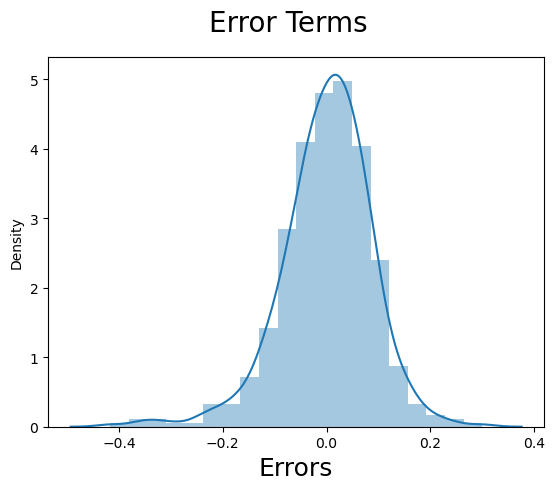

In [534]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [535]:
# we see that residual error has normal distributrion graph

### Applying the scaling on the test sets

In [536]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [537]:
y_test = df_test.pop('cnt')
X_test = df_test

In [538]:
final_var = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy']

In [539]:
X_test_new = X_test[final_var]

In [540]:
X_test_new = sm.add_constant(X_test_new)

In [541]:
y_pred = lr_11.predict(X_test_new)

Text(0, 0.5, 'y_pred')

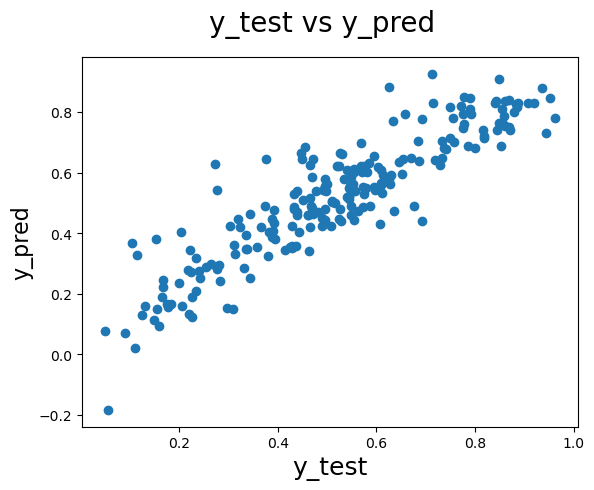

In [542]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)      

In [543]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8104202435274626

In [555]:
round(lr_11.params,3)

const            0.204
yr               0.230
workingday       0.053
temp             0.548
hum             -0.158
windspeed       -0.197
summer           0.072
winter           0.141
Dec             -0.035
Jan             -0.051
July            -0.041
Nov             -0.036
Sep              0.086
Sat              0.063
Light Snow      -0.250
Mist + Cloudy   -0.057
dtype: float64